### Introduction
The dataset contains information for various consumer information that can be used to predict car sales prices.The model being looked  at should anticipate to dealing with the following problem statement is for us to get to know  **The Amount Paid For A Car**.
This is a regresson problem can be solved using Machine learning and Deep learning techniques. 
Artificial Neural Networks alogorithim which is a deep learning technique is what will be used to deal with the problem

In [8]:
#import the required libraries
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

from warnings import filterwarnings 
filterwarnings("ignore")

In [9]:
#load dataset
df = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [10]:
#check the column labels
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
#dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [12]:
#correlation of the dataset for each column
df.corr()[["car purchase amount"]].sort_values(["car purchase amount"])

,car purchase amount
gender,-0.066408
credit card debt,0.028882
net worth,0.488580
annual Salary,0.617862
age,0.632865
car purchase amount,1.000000


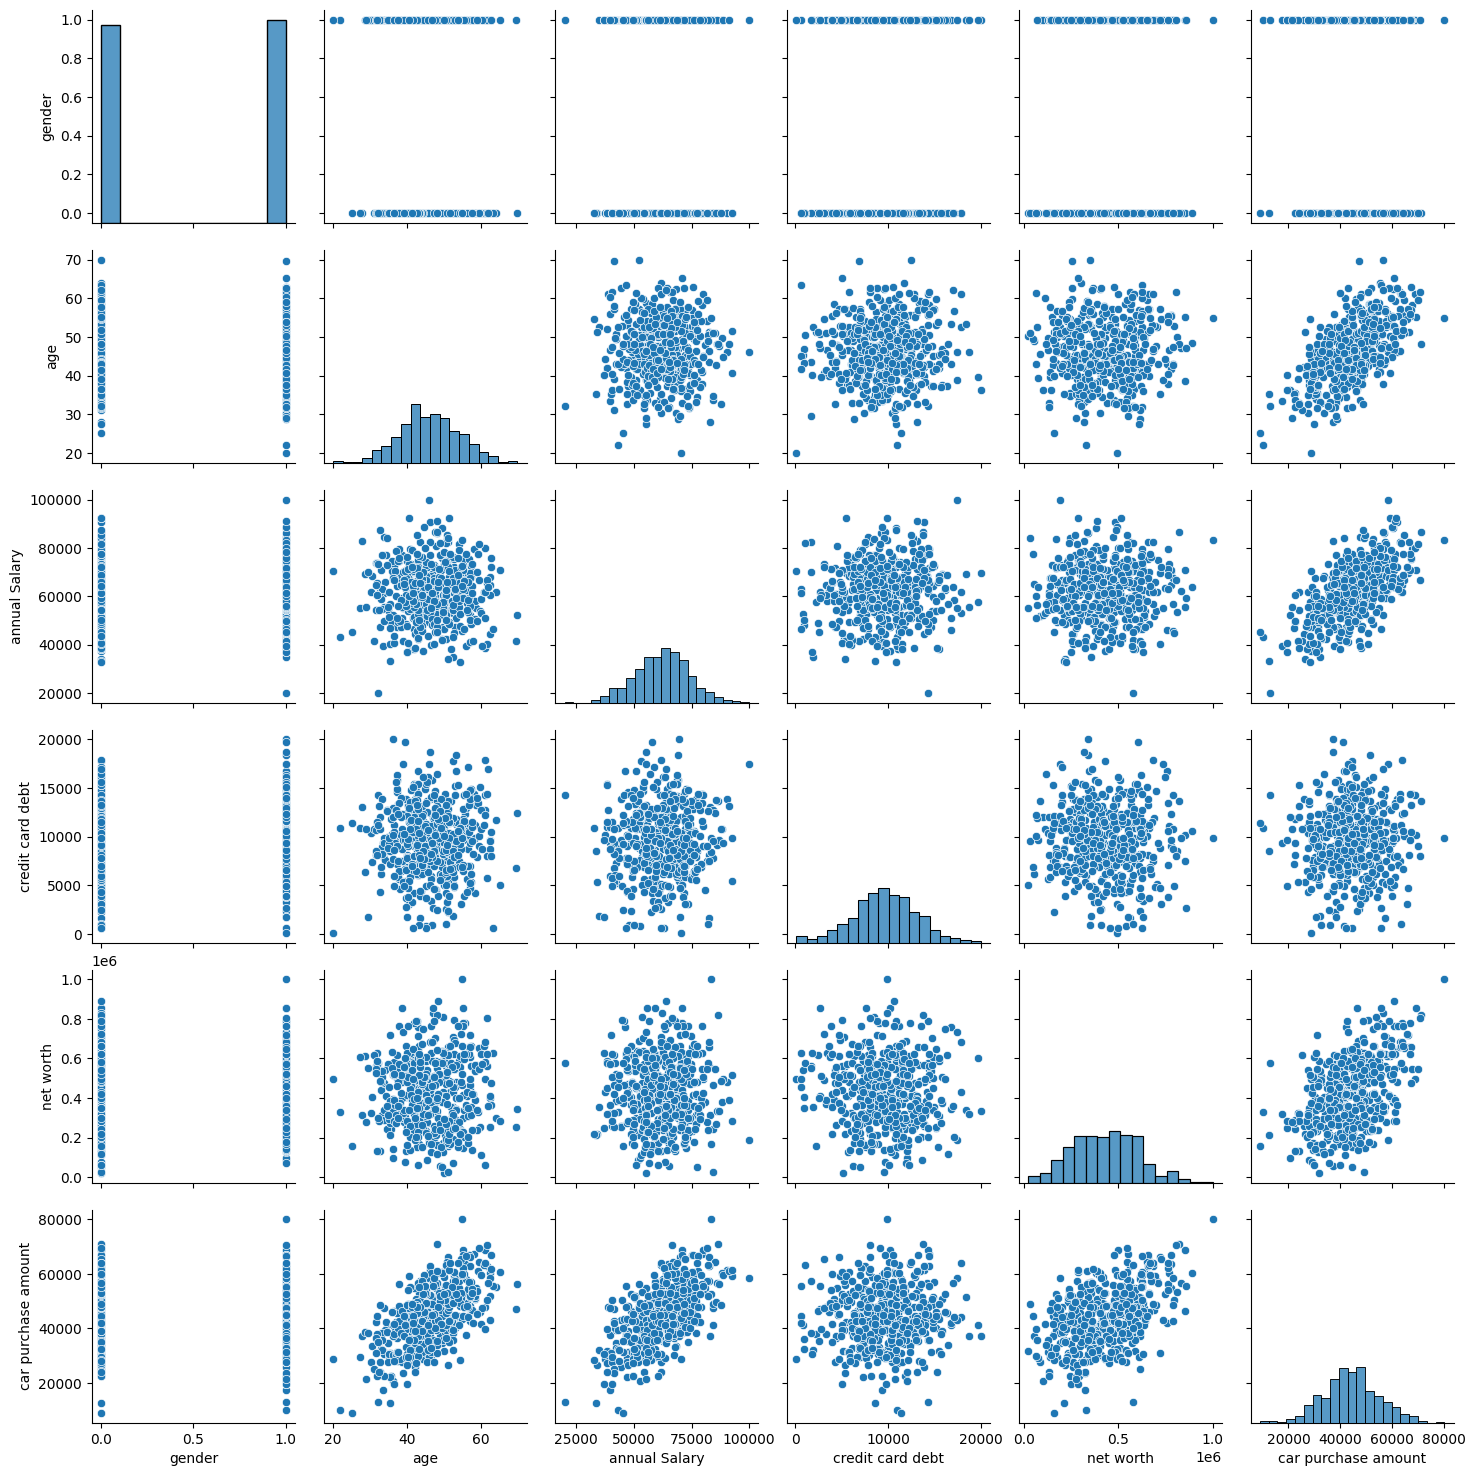

In [13]:
#Exploratory Data Analysis(EDA) for the dataset
sb.pairplot(df)

In [14]:
#missing data check
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [15]:
# drop columns 
df_car = df.drop(["customer name","customer e-mail","country"],axis=1)

In [16]:
#Define x and y
#specify independent and dependent variables

Y = df_car[["car purchase amount"]]
X = df_car.drop(["car purchase amount"],axis =1)

In [17]:
#check the shape for Y
X.shape

(500, 5)

In [18]:
#check the shape for Y
Y.shape

(500, 1)

In [19]:
#pre-processing the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
Y_scaled = mms.fit_transform(Y.values.reshape(-1,1))

In [20]:
#check new shape after pre-processing for x
X_scaled.shape

(500, 5)

In [21]:
#check new shape after pre-processing for Y
Y_scaled.shape

(500, 1)

In [22]:
#Divide the data into training and testing 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,
test_size = 0.25,random_state =101)

In [23]:
#check the shape for train and test data for both x and y
xtrain.shape

(375, 5)

In [24]:
ytrain.shape

(375, 1)

In [25]:
xtest.shape

(125, 5)

In [26]:
ytest.shape

(125, 1)

we now prepare the ANN model, we will be using Adam optimizer and mean square eror function for training and validating 

In [32]:
#importing libaries 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#initializing Neural Network layers
model = Sequential()
model.add(Dense(25, input_dim = 5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
          
#check model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 25)                150       
                                                                 
 dense_19 (Dense)            (None, 25)                650       
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [34]:
#initializing optimizer and loss function
model.compile(optimizer='adam',loss='mean_squared_error')

In [35]:
#visualize the model
print(model)

We done with designing the model,lets carry out training.Training will be done by fiting the model with the training data.we will use batches since our dataset is large.

In [40]:
#initializing batches and epochs
epochs_hist = model.fit(xtrain,ytrain,epochs=100,batch_size=5,verbose=1
                        ,validation_split=0.2)

Epoch 1/100


2022-11-11 20:45:49.518280: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-11 20:45:49.655474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - 2s 4ms/step - loss: 0.0536 - val_loss: 0.0122
Epoch 2/100
57/60 [===========================>..] - ETA: 0s - loss: 0.0083

2022-11-11 20:45:51.271158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


60/60 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0073
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 9.2736e-04 - val_loss: 8.2650e-04
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 7.4035e-04 - val_loss: 6.8686e-04
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 5.5074e-04 - val_loss: 5.5043e-04
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 3.8772e-04 - val_loss: 4.8351e-04
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 2.9571e-04 - v

Now lets plot Model loss during training or validation this will enable us to check for overfitting in our model. We will use loss and validation loss training metrics

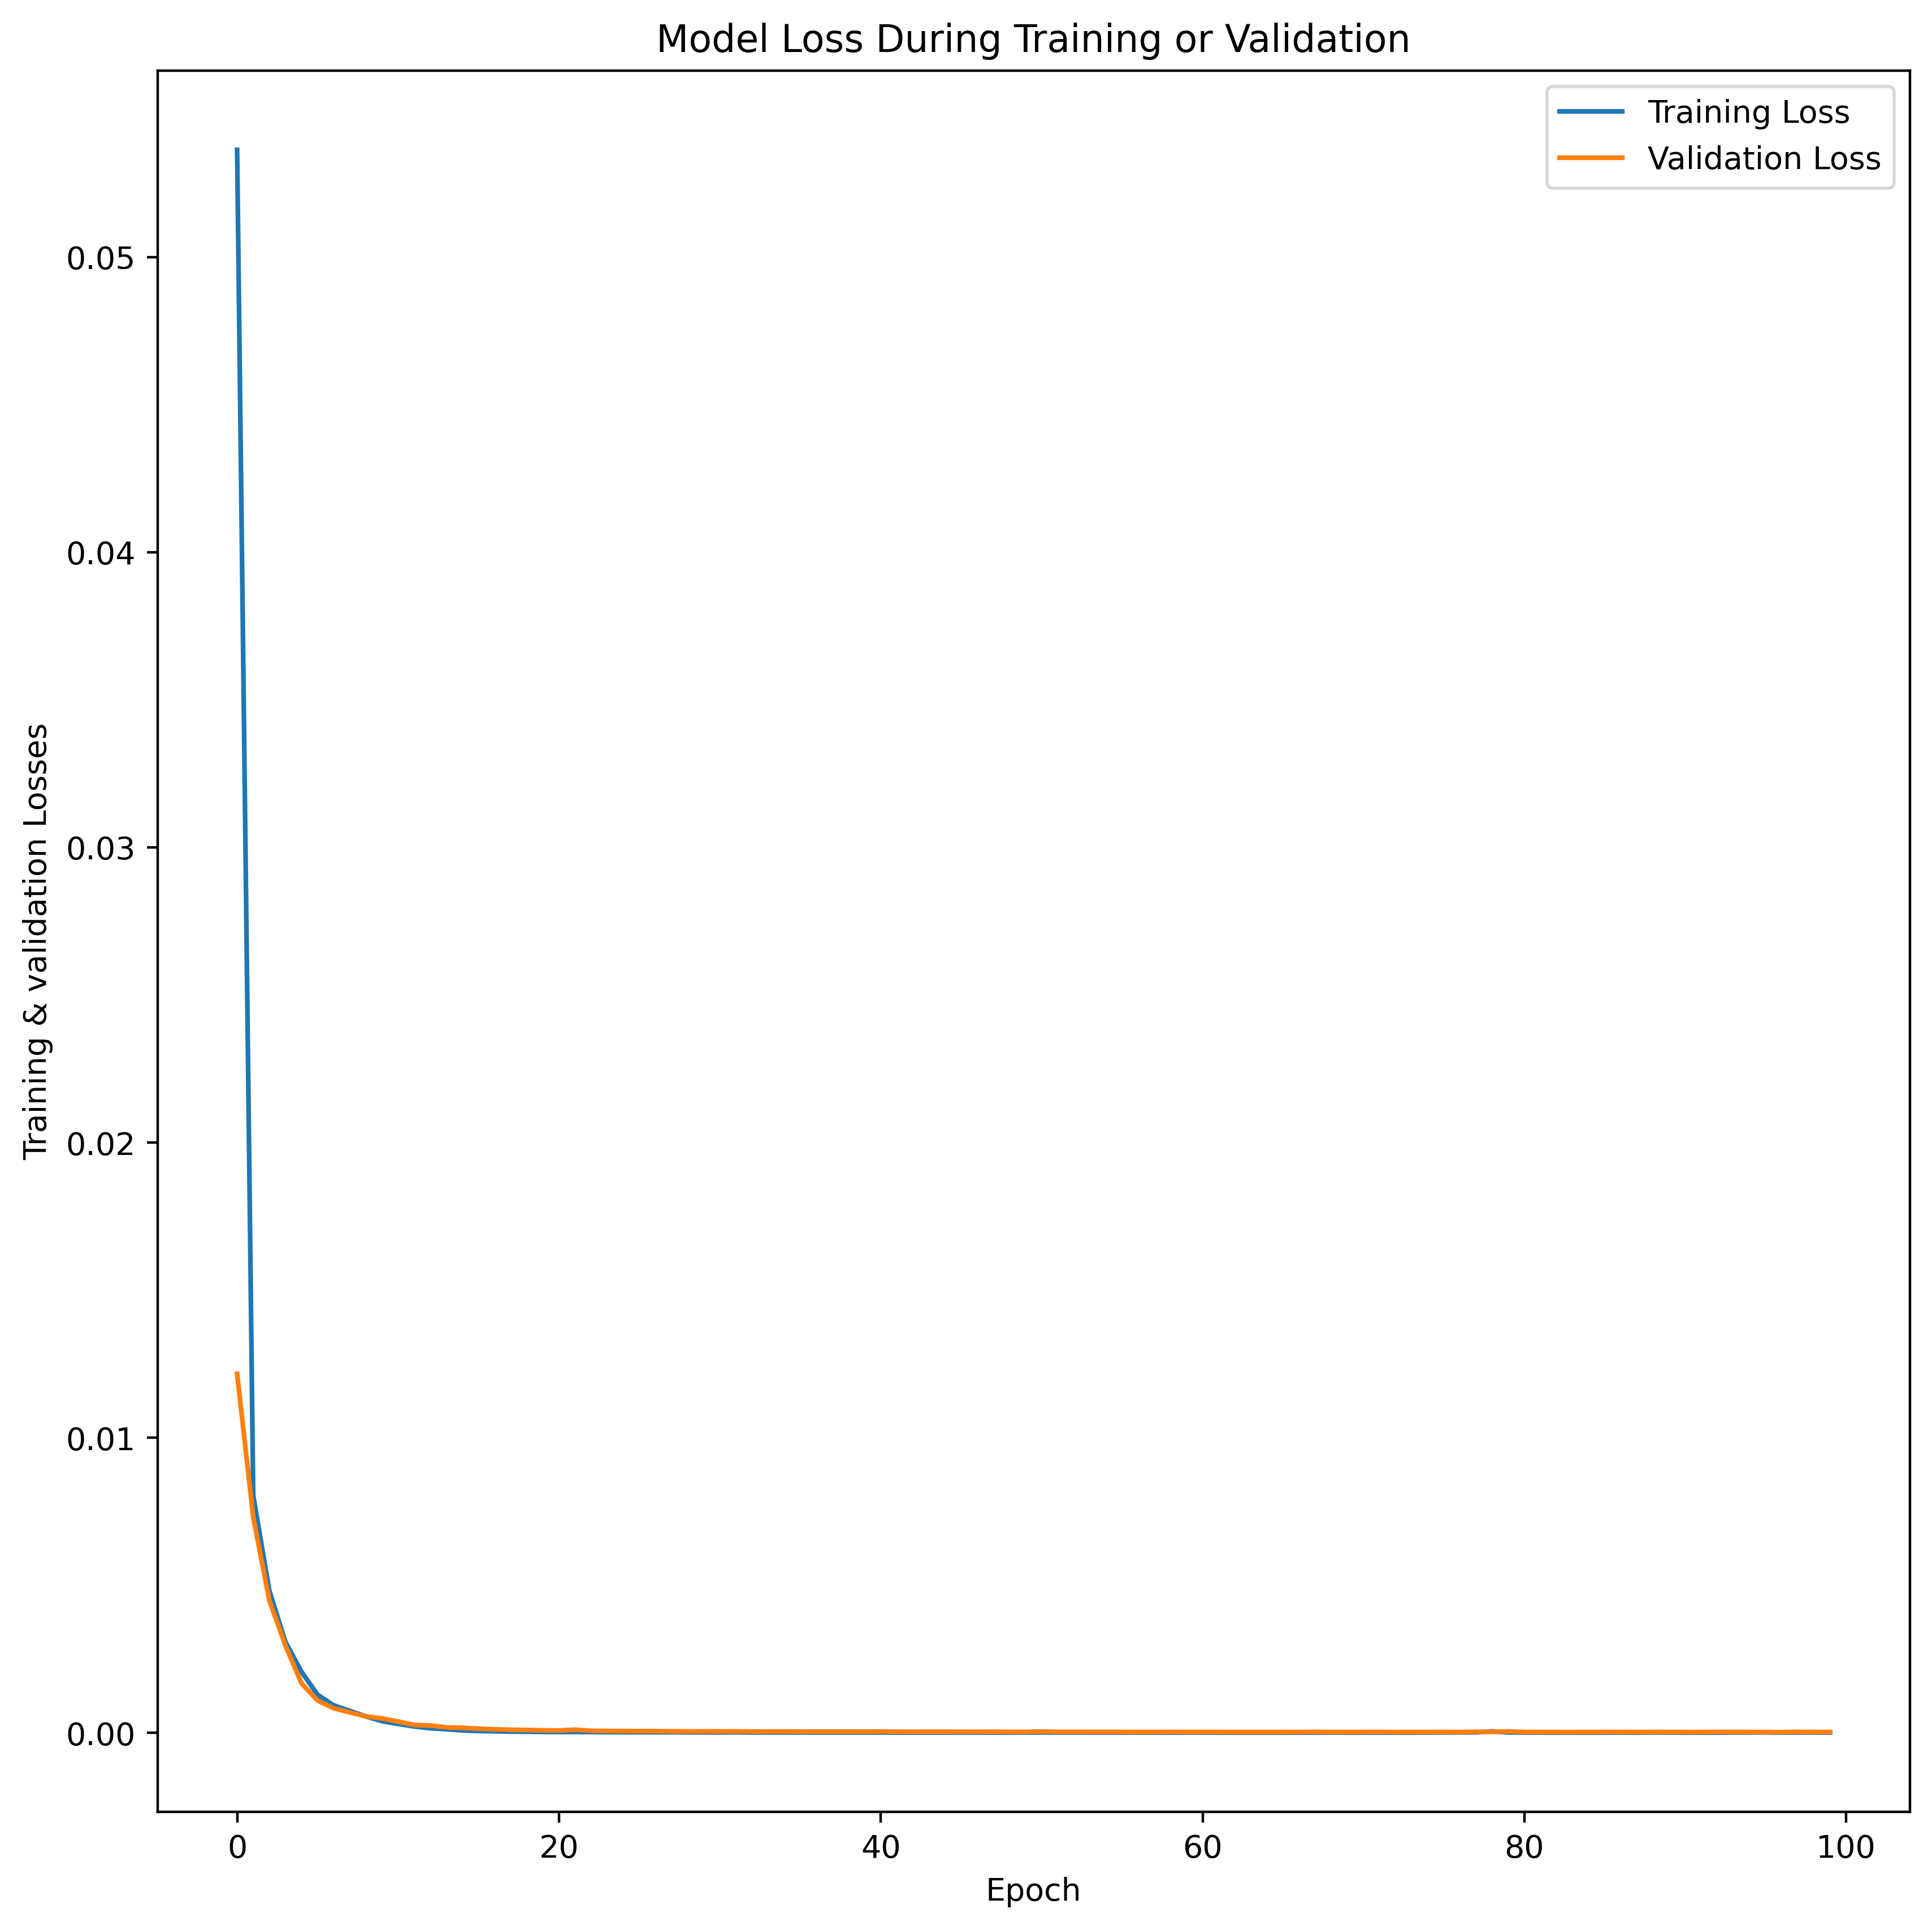

In [46]:
plt.figure(figsize=(10,10),dpi=400)
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])
         
plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'])

As per the plot we can observe that no overfitting occurence as the lines go down at the same time.

Lets carry out the model evaluation for this we will be using mean squared error,mean absolute eror and root mean squared error

In [48]:
#import evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [50]:
#prediction on the test set
predictions = model.predict(xtest)
print('MAE: ',mean_absolute_error(ytest,predictions))
print('MSE: ',mean_squared_error(ytest,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(ytest,predictions)))
print('Variance Regression Score: ',explained_variance_score(ytest,predictions))
print('\n\nDescriptive Statistics:\n',df['car purchase amount'].describe())

4/4 [==============================] - 0s 2ms/step
MAE:  0.001225221889206129
MSE:  1.8282075208712344e-05
RMSE:  0.004275754343821958
Variance Regression Score:  0.9991062470573212


Descriptive Statistics:
 count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64


lets carry out a prediction by provinding random data to our model

In [51]:
X_random_sample = np.array([[0,25,5500,11600,678956]])
Y_predict = model.predict(X_random_sample)

2022-11-11 22:19:22.062198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 225ms/step


In [54]:
Y_predict.shape

(1, 1)

In [55]:
#visulize the price
print('The Predicted purchase Amount is =',Y_predict[:,0])

The Predicted purchase Amount is = [263996.72]


We can observe that we are able to predict a random sample after giving our model data to work with.